Text(0, 0.5, 'time')

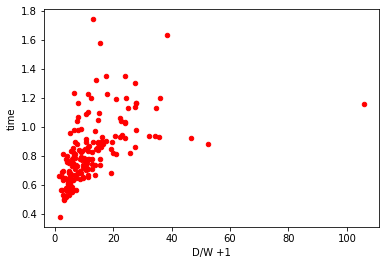

In [74]:
import matplotlib.pyplot as plt

file = open("data/time-distance.txt", 'r')
strings = file.readlines()
x=[]
y=[]
for i in strings:
    i=i.split('	')
    x.append(float(i[1].replace('\n','')))
    y.append(float(i[0].replace('\n','')))
# print(x)
plt.scatter(y, x, color = 'r', s = 20)
plt.xlabel('D/W +1')
plt.ylabel('time')



[0.76, 0.01]


TypeError: can only concatenate list (not "float") to list

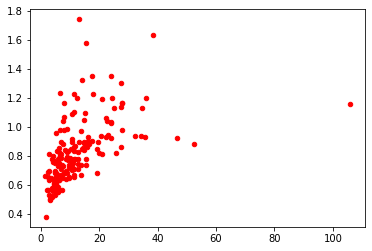

In [97]:
import math
import numpy as np
y_log = []
d=[]
dd=[]
for i in y:
    y_log.append(math.log(i,2))
fit_line = np.polyfit(y_log, x, 1) # input 의미 : x축 데이터, y축 데이터, 1차원
# print(y_log)
print(fit_line)
for i in range(150):
    if i != 0 and (math.log(i,2)*fit_line[0])+fit_line[1]>0:
        d.append(i)
        dd.append((math.log(i,2)*fit_line[0]))
# print(d)
plt.scatter(y, x, color = 'r', s = 20)
plt.plot(d,dd + fit_line[1])
plt.xlabel('time')
plt.ylabel('D/W +1')
plt.show()


In [91]:
from sklearn.metrics import r2_score

est_y = np.array(y_log) * fit_line[0] + fit_line[1] # x의 실제 값들을 회귀식에 대입한 y 추정치

r2 = r2_score(x, est_y) 

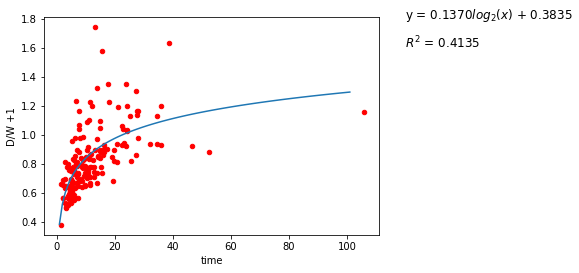

In [95]:
plt.text(120, 1.6, '$R^2$ = %.4f'%r2, size = 12)
plt.text(120, 1.8, 'y = %.4f$log_{2}(x)$ + %.4f'%(fit_line[0], fit_line[1]), size = 12)
plt.scatter(y, x, color = 'r', s = 20)
plt.plot(d,dd + fit_line[1])
plt.xlabel('time')
plt.ylabel('D/W +1')
plt.show()